# Rejection Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 1.2 - x ** 4

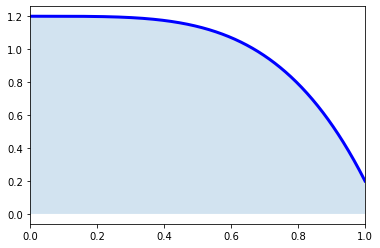

In [3]:
xs = np.linspace(0, 1, 1000)
ys = f(xs)

plt.plot(xs, ys, c='b', lw=3);
plt.fill_between(xs, ys, 0, alpha=0.2);
plt.xlim(0,1);

In [4]:
def sample(function, xmin=0, xmax=1, ymax=1.2):
    while True:
        x = np.random.uniform(low=xmin, high=xmax)
        y = np.random.uniform(low=0, high=ymax)
        if y < function(x):
            return x

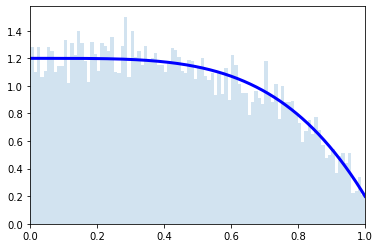

In [5]:
samps = [sample(f) for i in range(10000)]

plt.plot(xs, ys, c='b', lw=3);
plt.hist(samps, density=True, bins=100, alpha=0.2);
plt.xlim(0,1);

In [6]:
def batch_sample(function, n_samples, xmin=0, xmax=1, ymax=1.2, batch=1000):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(low=xmin, high=xmax, size=batch)
        y = np.random.uniform(low=0, high=ymax, size=batch)
        samples += x[y < function(x)].tolist()
    return samples[:n_samples]

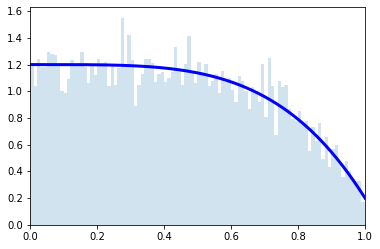

In [7]:
samps = batch_sample(f, 10000)

plt.plot(xs, ys, c='b', lw=3);
plt.hist(samps, density=True, bins=100, alpha=0.2);
plt.xlim(0,1);

In [8]:
%timeit [sample(f) for i in range(10000)]

90.2 ms ± 7.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit batch_sample(f, 10000)

867 µs ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
def gauss(x):
    return np.exp(-np.pi * x**2)

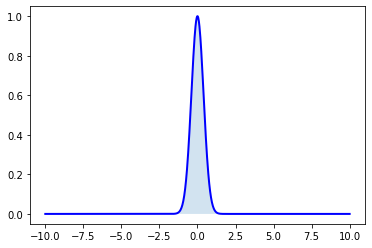

In [11]:
xs = np.linspace(-10, 10, 1000)
ys = gauss(xs)

plt.plot(xs, ys, lw=2, c='b');
plt.fill_between(xs, ys, 0, alpha=0.2);

In [12]:
def batch_sample2(function, n_samples, xmin=-10, xmax=10, ymax=1):
    x = np.random.uniform(low=xmin, high=xmax, size=n_samples)
    y = np.random.uniform(low=0, high=ymax, size=n_samples)
    passed = (y < function(x)).astype(int)
    return x, y, passed

Efficiency is only 4.6%


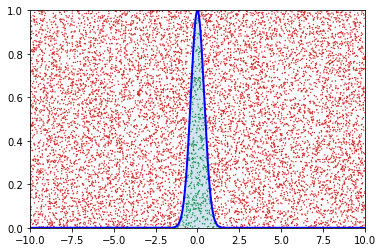

In [13]:
x, y, passed = batch_sample2(gauss, 10000)

plt.plot(xs, ys, lw=2, c='b');
plt.fill_between(xs, ys, 0, alpha=0.2);
plt.scatter(x, y, c=passed, cmap='RdYlGn', vmin=-0.1, vmax=1.1, lw=0, s=2);
plt.xlim(-10,10);
plt.ylim(0,1);

print(f'Efficiency is only {passed.mean() * 100:0.1f}%')